In [112]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
df_news=pd.read_csv(r"files\TSLANews.csv")

In [33]:
df_news.head()

,ID,Dates,Text,Link,DATETIME,Date
0,0,Apr 28 2016 10:00AM EDT,Energy storage has finally captured the imagin...,https://www.nasdaq.com/articles/lockheed-marti...,2016-04-28 10:00:00,2016-04-28
1,1,Apr 28 2016 10:23AM EDT,InvestorPlaceInvestorPlace - Stock Market New...,https://www.nasdaq.com/articles/apple-inc.-aap...,2016-04-28 10:23:00,2016-04-28
2,2,Apr 28 2016 11:44AM EDT,InvestorPlaceInvestorPlace - Stock Market New...,https://www.nasdaq.com/articles/alphabet-inc%3...,2016-04-28 11:44:00,2016-04-28
3,3,Apr 29 2016 2:22AM EDT,Ford ( F ) reported an all time record pre-tax...,https://www.nasdaq.com/articles/ford-posts-rec...,2016-04-29 02:22:00,2016-04-29
4,4,Apr 29 2016 3:43AM EDT,Tesla CEO Elon Musk introduces the Model X. So...,https://www.nasdaq.com/articles/mark-zuckerber...,2016-04-29 03:43:00,2016-04-29


In [107]:
df4Y=pd.read_csv(r"files\TSLAPrices.csv")
df4Y=df4Y.sort_values(by=["Date"])

In [36]:
df4Y.head()

,Date,Close,Volume,Open,High,Low
0,2020-11-06,429.95,21706010,436.10,436.5700,424.2800
1,2020-11-05,438.09,28414520,428.30,440.0000,424.0001
2,2020-11-04,420.98,32143060,430.62,435.4000,417.1000
3,2020-11-03,423.90,34351720,409.73,427.7700,406.6900
4,2020-11-02,400.51,29021120,394.00,406.9799,392.3000


In [37]:
x=df_news[df_news["Date"]=="2016-04-29"]

In [43]:
y=df_news["Date"].value_counts()
yy=pd.DataFrame(y)
yy.reset_index(inplace=True)
yy = yy.rename(columns = {'index':'Dates',"Date":"Counts"})


,Dates,Counts
0,2020-09-08,40
1,2020-07-02,39
2,2020-09-10,37
3,2020-10-02,35
4,2020-10-22,35
...,...,...
1476,2016-08-27,1
1477,2020-10-11,1
1478,2018-03-10,1
1479,2019-12-22,1


In [45]:
tt=yy[yy["Counts"]>1]
tt["Dates"]

0       2020-09-08
1       2020-07-02
2       2020-09-10
3       2020-10-02
4       2020-10-22
           ...    
1251    2018-07-29
1252    2020-08-07
1253    2018-01-19
1254    2019-04-21
1255    2019-07-15
Name: Dates, Length: 1256, dtype: object

In [83]:
new_df=pd.DataFrame()
for i in tt["Dates"]:
    temp_df=df_news[df_news["Date"]==i]
    s=""
    for j,row in temp_df.iterrows():
        s+=row["Text"]
    dict_news={"Date":i,"Text":s}
    new_df=new_df.append(dict_news,ignore_index=True)


In [95]:
new_df["Text_Len"]=new_df["Text"].apply(len)


In [97]:
ss=df_news[df_news["Date"]=="2020-09-08"]

In [100]:
ss["Len"]=ss["Text"].apply(len)

C:\Users\enesy\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [102]:
ss["Len"].sum()

154087

In [104]:
new_df.to_csv(r"files\ConcTSLANews.csv")

In [105]:
new_df

,Date,Text,Text_Len
0,2020-09-08,"BEIJING, Sept 8 (Reuters) - U.S. electric vehi...",154087
1,2020-07-02,"BEIJING, July 2 (Reuters) - Jia Yueting, found...",123024
2,2020-09-10,"By Lewis KrauskopfNEW YORK, Sept 10 (Reuters) ...",205666
3,2020-10-02,"BENGALURU, Oct 2 (Reuters) - Tesla Inc TSLA.O ...",167944
4,2020-10-22,Image source: The Motley Fool.Tesla (NASDAQ: T...,195081
...,...,...,...
1251,2018-07-29,For all the back and forth in the media about ...,11092
1252,2020-08-07,"Hype is a great product in the short term, but...",10237
1253,2018-01-19,By SA Editor Michelle Carini :Welcome to the l...,8389
1254,2019-04-21,(RTTNews) - Tesla Inc. (TSLA) announced that f...,9130


In [108]:
df4Y

,Date,Close,Volume,Open,High,Low
1056,2016-08-29,43.04,16306905,44.030,44.0800,43.0000
1055,2016-08-30,42.27,15821110,43.222,43.2220,42.1040
1054,2016-08-31,42.40,16374270,42.086,42.5200,41.7300
1053,2016-09-01,40.15,39662220,41.802,42.2200,40.1000
1052,2016-09-02,39.56,29850770,40.466,40.6400,39.2400
...,...,...,...,...,...,...
4,2020-11-02,400.51,29021120,394.000,406.9799,392.3000
3,2020-11-03,423.90,34351720,409.730,427.7700,406.6900
2,2020-11-04,420.98,32143060,430.620,435.4000,417.1000
1,2020-11-05,438.09,28414520,428.300,440.0000,424.0001


In [109]:
merged=pd.merge(df4Y,new_df,on=["Date"])

In [110]:
merged

,Date,Close,Volume,Open,High,Low,Text,Text_Len
0,2016-08-29,43.04,16306905,44.030,44.0800,43.0000,"Last week, Delphi (NYSE: DLPH) and Mobileye (N...",29932
1,2016-08-30,42.27,15821110,43.222,43.2220,42.1040,It's an electric Chevrolet Colorado pickup pow...,34453
2,2016-08-31,42.40,16374270,42.086,42.5200,41.7300,Image source: U.S. Energy Information Administ...,32957
3,2016-09-01,40.15,39662220,41.802,42.2200,40.1000,InvestorPlaceInvestorPlace - Stock Market New...,35167
4,2016-09-02,39.56,29850770,40.466,40.6400,39.2400,"On Wednesday morning, electric-car maker Tesla...",43370
...,...,...,...,...,...,...,...,...
994,2020-11-02,400.51,29021120,394.000,406.9799,392.3000,"The higher one climbs, the harder one falls. S...",32701
995,2020-11-03,423.90,34351720,409.730,427.7700,406.6900,"InvestorPlace - Stock Market News, Stock Advic...",53159
996,2020-11-04,420.98,32143060,430.620,435.4000,417.1000,"InvestorPlace - Stock Market News, Stock Advic...",94885
997,2020-11-05,438.09,28414520,428.300,440.0000,424.0001,"BERLIN, Nov 5 (Reuters) - Tesla Inc TSLA.O Chi...",39926


In [111]:
new_df[new_df["Date"]=="2020-11-03"]

,Date,Text,Text_Len
184,2020-11-03,"InvestorPlace - Stock Market News, Stock Advic...",53159


In [113]:
merged["Diff"]=merged["Close"]-merged["Open"]
merged["Diff_Perc"]=merged["Diff"]/merged["Open"]
merged.loc[merged['Diff'] < 0, 'Status'] = -1
merged.loc[merged['Diff'] > 0, 'Status'] = 1
merged.loc[merged['Diff'] == 0, 'Status'] = 0

In [114]:
merged

,Date,Close,Volume,Open,High,Low,Text,Text_Len,Diff,Diff_Perc,Status
0,2016-08-29,43.04,16306905,44.030,44.0800,43.0000,"Last week, Delphi (NYSE: DLPH) and Mobileye (N...",29932,-0.990,-0.022485,-1.0
1,2016-08-30,42.27,15821110,43.222,43.2220,42.1040,It's an electric Chevrolet Colorado pickup pow...,34453,-0.952,-0.022026,-1.0
2,2016-08-31,42.40,16374270,42.086,42.5200,41.7300,Image source: U.S. Energy Information Administ...,32957,0.314,0.007461,1.0
3,2016-09-01,40.15,39662220,41.802,42.2200,40.1000,InvestorPlaceInvestorPlace - Stock Market New...,35167,-1.652,-0.039520,-1.0
4,2016-09-02,39.56,29850770,40.466,40.6400,39.2400,"On Wednesday morning, electric-car maker Tesla...",43370,-0.906,-0.022389,-1.0
...,...,...,...,...,...,...,...,...,...,...,...
994,2020-11-02,400.51,29021120,394.000,406.9799,392.3000,"The higher one climbs, the harder one falls. S...",32701,6.510,0.016523,1.0
995,2020-11-03,423.90,34351720,409.730,427.7700,406.6900,"InvestorPlace - Stock Market News, Stock Advic...",53159,14.170,0.034584,1.0
996,2020-11-04,420.98,32143060,430.620,435.4000,417.1000,"InvestorPlace - Stock Market News, Stock Advic...",94885,-9.640,-0.022386,-1.0
997,2020-11-05,438.09,28414520,428.300,440.0000,424.0001,"BERLIN, Nov 5 (Reuters) - Tesla Inc TSLA.O Chi...",39926,9.790,0.022858,1.0


[  2.   1.   4.   3.   6.  11.  15.  25.  53.  79. 114. 156. 173. 116.
  95.  59.  33.  16.   6.   9.   6.   6.   1.   4.   1.   2.   0.   1.
   1.   1.]
[-0.10757233 -0.0987265  -0.08988068 -0.08103485 -0.07218902 -0.06334319
 -0.05449736 -0.04565153 -0.0368057  -0.02795987 -0.01911404 -0.01026821
 -0.00142238  0.00742345  0.01626928  0.02511511  0.03396094  0.04280677
  0.0516526   0.06049843  0.06934426  0.07819008  0.08703591  0.09588174
  0.10472757  0.1135734   0.12241923  0.13126506  0.14011089  0.14895672
  0.15780255]
<a list of 30 Patch objects>


ValueError: arrays must all be same length

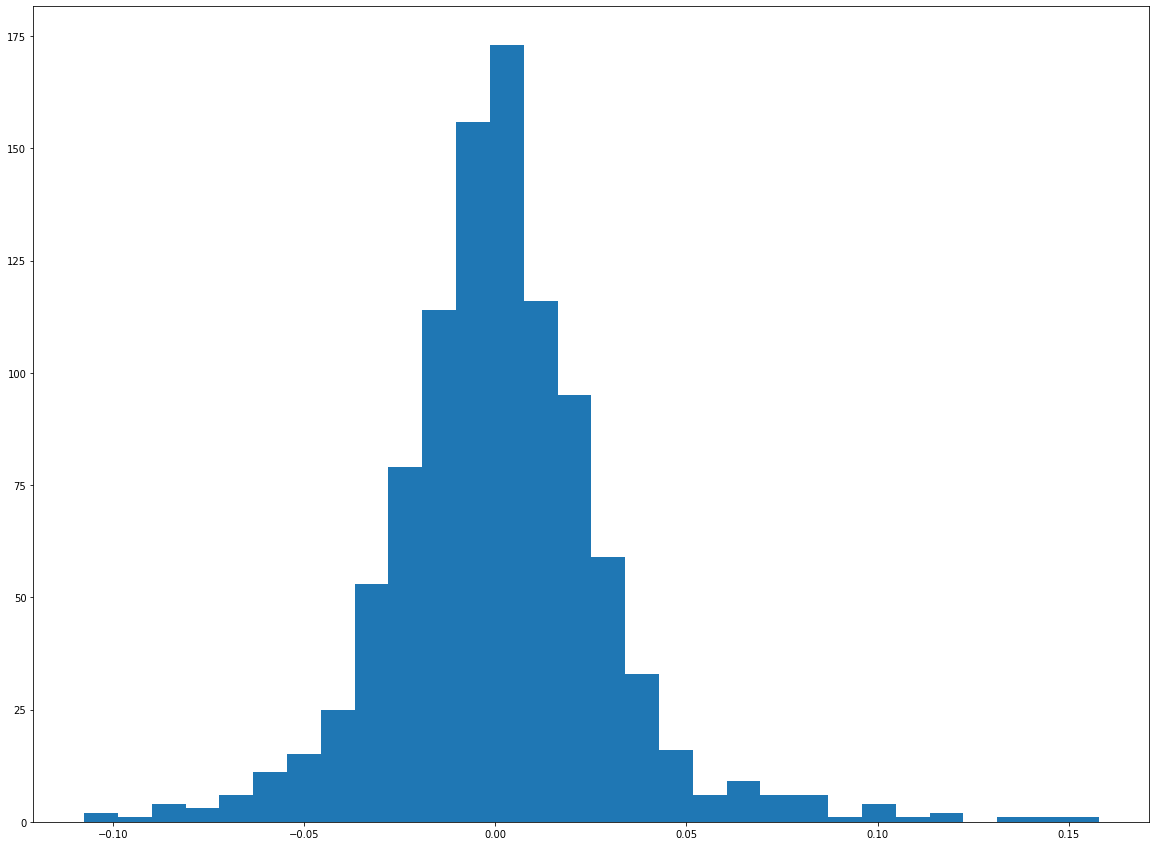

In [117]:
#df_s["DIFF_PERC"].hist(bins=50)
plt.figure(figsize=(20,15))
counts, bins, bars = plt.hist(merged["Diff_Perc"],bins=30)
print(counts)
print(bins)
print(bars)




In [118]:
margin_neg=0.01626928
margin_pos=0.02511511

mask = (merged['Diff_Perc'] > margin_neg) & (merged['Diff_Perc'] <= margin_pos)
merged.loc[mask,"Diff_Perc"]=0
merged.loc[mask,"Status"]=0
merged["Diff_Perc"].value_counts(sort=True)


 0.000000    95
-0.020000     2
 0.025155     1
-0.013588     1
-0.023766     1
             ..
-0.041687     1
-0.069863     1
-0.030168     1
 0.010067     1
-0.005165     1
Name: Diff_Perc, Length: 904, dtype: int64

In [174]:
merged.to_csv(r"files\merged.csv")

In [139]:
from keras.preprocessing.text import Tokenizer
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk import WordPunctTokenizer

nltk.download("punkt")
nltk.download("wordnet")
nltk.download("stopwords")
en_stop=set(nltk.corpus.stopwords.words("english"))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\enesy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\enesy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\enesy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Text
0,"Last week, Delphi (NYSE: DLPH) and Mobileye (N..."


In [157]:
def preprocess_text(document):
    document=re.sub(r"\W"," ",str(document))
    document=re.sub(r"\s+[azAz]\s+"," ",document)
    document=re.sub(r"\^[azAz]\s+"," ",document)
    document=re.sub(r"\s+"," ",document,flags=re.I)
    document=re.sub(r"^b\s+"," ",document)
    document=document.lower()
    
    tokens=document.split()
    porter=PorterStemmer()
    tokens=[porter.stem(word) for word in tokens]
    tokens=[word for word in tokens if word not in en_stop]
    tokens=[word for word in tokens if len(word)>3]
    
    preprocessed_text=" ".join(tokens)
    
    return preprocessed_text

In [159]:
x=merged.loc[[0],["Text"]]

txt=preprocess_text(str(x))

                                                Text 0  Last week  Delphi  NYSE  DLPH  and Mobileye  N   


In [160]:
txt

'text last week delphi nyse dlph mobiley'

In [165]:
tokens=str(x).split()

In [168]:
tokens

['Text',
 '0',
 'Last',
 'week,',
 'Delphi',
 '(NYSE:',
 'DLPH)',
 'and',
 'Mobileye',
 '(N...']

In [169]:
merged

,Date,Close,Volume,Open,High,Low,Text,Text_Len,Diff,Diff_Perc,Status
0,2016-08-29,43.04,16306905,44.030,44.0800,43.0000,"Last week, Delphi (NYSE: DLPH) and Mobileye (N...",29932,-0.990,-0.022485,-1.0
1,2016-08-30,42.27,15821110,43.222,43.2220,42.1040,It's an electric Chevrolet Colorado pickup pow...,34453,-0.952,-0.022026,-1.0
2,2016-08-31,42.40,16374270,42.086,42.5200,41.7300,Image source: U.S. Energy Information Administ...,32957,0.314,0.007461,1.0
3,2016-09-01,40.15,39662220,41.802,42.2200,40.1000,InvestorPlaceInvestorPlace - Stock Market New...,35167,-1.652,-0.039520,-1.0
4,2016-09-02,39.56,29850770,40.466,40.6400,39.2400,"On Wednesday morning, electric-car maker Tesla...",43370,-0.906,-0.022389,-1.0
...,...,...,...,...,...,...,...,...,...,...,...
994,2020-11-02,400.51,29021120,394.000,406.9799,392.3000,"The higher one climbs, the harder one falls. S...",32701,6.510,0.000000,0.0
995,2020-11-03,423.90,34351720,409.730,427.7700,406.6900,"InvestorPlace - Stock Market News, Stock Advic...",53159,14.170,0.034584,1.0
996,2020-11-04,420.98,32143060,430.620,435.4000,417.1000,"InvestorPlace - Stock Market News, Stock Advic...",94885,-9.640,-0.022386,-1.0
997,2020-11-05,438.09,28414520,428.300,440.0000,424.0001,"BERLIN, Nov 5 (Reuters) - Tesla Inc TSLA.O Chi...",39926,9.790,0.000000,0.0


In [175]:

m=merged.loc[[0],["Text"]].apply(word_tokenize)


TypeError: expected string or bytes-like object

In [173]:
m

['Text',
 '0',
 'Last',
 'week',
 ',',
 'Delphi',
 '(',
 'NYSE',
 ':',
 'DLPH',
 ')',
 'and',
 'Mobileye',
 '(',
 'N',
 '...']